### 1.Import numpy and pandas and load data file named 'test_Y3wMUE5_7gLdaTN.csv' as test



In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

df=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### 2.Print list of column names


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### 3.Types of data columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### 4.Summary statistics


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### DATA CLEANING AND PREPROCESSING

### 5.Find missing values

In [7]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,True,False
365,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

### 6.Impute missing values with mean (numerical variables)


In [15]:
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

### 7.Impute missing values with mode (categorical variables)


In [16]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

### 8.Remove irrelevant columns Loan_ID variable - Irrelevant from test and train data



In [19]:
df.drop('Loan_ID', axis=1, inplace=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


### 9.Build dummy variables for categorical variables



In [20]:
df_dummies = pd.get_dummies(df)
df_dummies

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


### 10.Get x as columns of ApplicantIncome and Credit_History


In [24]:
x = df_dummies[['ApplicantIncome', 'Credit_History']]

In [74]:
X = df_dummies.iloc[:, [0,4]].values
X

array([[5.72000000e+03, 1.00000000e+00],
       [3.07600000e+03, 1.00000000e+00],
       [5.00000000e+03, 1.00000000e+00],
       [2.34000000e+03, 8.25443787e-01],
       [3.27600000e+03, 1.00000000e+00],
       [2.16500000e+03, 1.00000000e+00],
       [2.22600000e+03, 1.00000000e+00],
       [3.88100000e+03, 0.00000000e+00],
       [1.36330000e+04, 1.00000000e+00],
       [2.40000000e+03, 1.00000000e+00],
       [3.09100000e+03, 1.00000000e+00],
       [2.18500000e+03, 1.00000000e+00],
       [4.16600000e+03, 8.25443787e-01],
       [1.21730000e+04, 0.00000000e+00],
       [4.66600000e+03, 1.00000000e+00],
       [5.66700000e+03, 1.00000000e+00],
       [4.58300000e+03, 1.00000000e+00],
       [3.78600000e+03, 1.00000000e+00],
       [9.22600000e+03, 1.00000000e+00],
       [1.30000000e+03, 1.00000000e+00],
       [1.88800000e+03, 1.00000000e+00],
       [2.08300000e+03, 1.00000000e+00],
       [3.90900000e+03, 1.00000000e+00],
       [3.76500000e+03, 1.00000000e+00],
       [5.400000

### 11.Import matplotlib and plot scatter between applicantincome and credit history

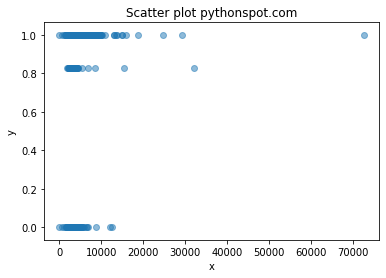

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df_dummies['ApplicantIncome'], df_dummies['Credit_History'], alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 12.Elbow method to determine K and plot Elbow Method


In [75]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[8826028226.821074,
 3923519733.7950935,
 1836441821.2419584,
 876034410.2971239,
 505201285.64564025,
 270653338.9681065,
 191608570.66358033,
 151089433.9419731,
 126227591.01201048,
 103634601.1658626]

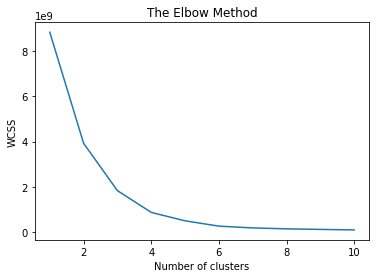

In [76]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 13.fit K_means with founded K



In [77]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)


### 14.show cluster results


In [78]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,

### 15.print cluster centers


In [79]:
kmeans.cluster_centers_

array([[3.53903247e+03, 8.10506801e-01],
       [2.62010000e+04, 9.56360947e-01],
       [7.25290000e+04, 1.00000000e+00],
       [9.19074074e+03, 8.97709840e-01]])

In [80]:
X

array([[5.72000000e+03, 1.00000000e+00],
       [3.07600000e+03, 1.00000000e+00],
       [5.00000000e+03, 1.00000000e+00],
       [2.34000000e+03, 8.25443787e-01],
       [3.27600000e+03, 1.00000000e+00],
       [2.16500000e+03, 1.00000000e+00],
       [2.22600000e+03, 1.00000000e+00],
       [3.88100000e+03, 0.00000000e+00],
       [1.36330000e+04, 1.00000000e+00],
       [2.40000000e+03, 1.00000000e+00],
       [3.09100000e+03, 1.00000000e+00],
       [2.18500000e+03, 1.00000000e+00],
       [4.16600000e+03, 8.25443787e-01],
       [1.21730000e+04, 0.00000000e+00],
       [4.66600000e+03, 1.00000000e+00],
       [5.66700000e+03, 1.00000000e+00],
       [4.58300000e+03, 1.00000000e+00],
       [3.78600000e+03, 1.00000000e+00],
       [9.22600000e+03, 1.00000000e+00],
       [1.30000000e+03, 1.00000000e+00],
       [1.88800000e+03, 1.00000000e+00],
       [2.08300000e+03, 1.00000000e+00],
       [3.90900000e+03, 1.00000000e+00],
       [3.76500000e+03, 1.00000000e+00],
       [5.400000

### 16.Lets plot those clusters!


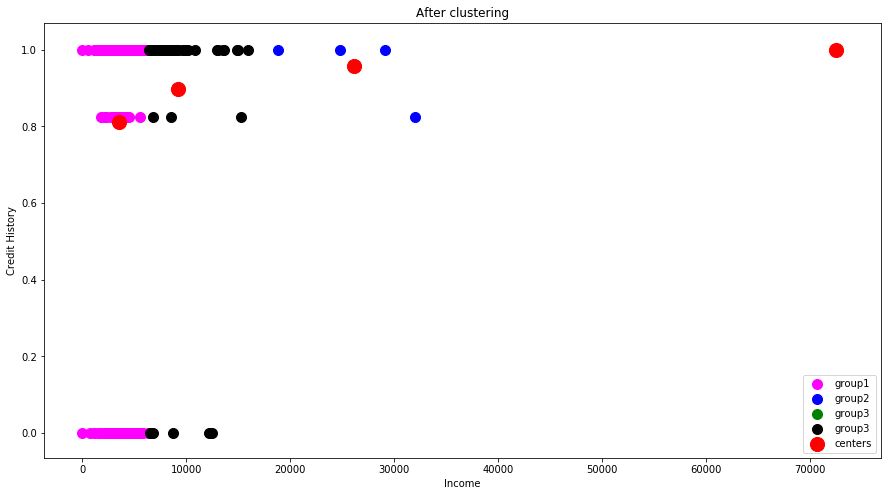

In [81]:
fig = plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c ='magenta', label='group1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c= 'blue', label='group2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c = 'green', label = 'group3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c = 'black', label = 'group3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label = 'centers')
plt.title('After clustering')
plt.xlabel('Income')
plt.ylabel('Credit History')
plt.legend()
plt.show()

### 17.Create dendogram



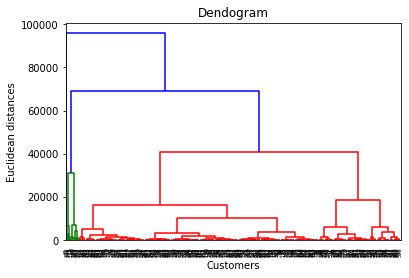

In [82]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### 18.Fit agglomerative hierarchical clustering



In [83]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(x)
hc_predict

array([2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,

In [85]:
X[hc_predict==0,0]

array([13633., 12173., 13518., 12500., 32000., 12941., 15312., 13083.,
       14911., 18840., 24797., 29167., 14987., 16000.])

### 19.Lets plot those clusters!



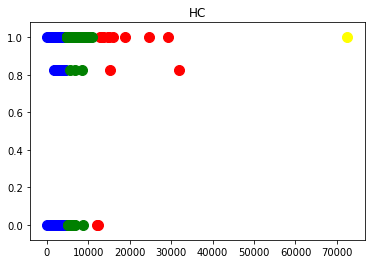

In [87]:

plt.scatter(X[hc_predict==0,0],X[hc_predict==0,1],s=100, c='red')
plt.scatter(X[hc_predict==1,0],X[hc_predict==1,1],s=100, c='blue')
plt.scatter(X[hc_predict==2,0],X[hc_predict==2,1],s=100, c='green')
plt.scatter(X[hc_predict==3,0],X[hc_predict==3,1],s=100, c='yellow')
plt.title('HC')
plt.show()